In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [3]:
train_path = r'../preprocessed_data/preprocessed_train.csv'
test_path = r'../preprocessed_data/preprocessed_test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


# DATA SPLIT

In [4]:
feature_names = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
                 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
                 'talk_time', 'blue_1', 'dual_sim_1', 'four_g_1',
                 'n_cores_2', 'n_cores_3', 'n_cores_4', 'n_cores_5', 'n_cores_6',
                 'n_cores_7', 'n_cores_8', 'three_g_1', 'touch_screen_1', 'wifi_1']

In [5]:
X = train_df[feature_names]
y = train_df['price_range']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 1021)

# SVM parameter

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [9]:
params = {'C' : [0.01, 0.1, 0.5, 1, 5, 10], 'gamma' : [0.01, 0.1, 0.5, 1, 5, 10]}

grid_svm = GridSearchCV(SVC(), params, cv = 5)

In [10]:
grid_svm.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10],
                         'gamma': [0.01, 0.1, 0.5, 1, 5, 10]})

In [11]:
grid_svm_result = pd.DataFrame(grid_svm.cv_results_['params'])

In [12]:
grid_svm_result['score'] = grid_svm.cv_results_['mean_test_score']

In [13]:
pd.pivot_table(grid_svm_result, index = 'C', columns = 'gamma', values = 'score', aggfunc = 'mean')

gamma,0.01,0.10,0.50,1.00,5.00,10.00
C,,,,,,
0.01,0.307143,0.305000,0.294286,0.257857,0.257857,0.298571
0.10,0.515000,0.532143,0.294286,0.257857,0.257857,0.257857
0.50,0.883571,0.848571,0.294286,0.257857,0.257857,0.257857
1.00,0.920000,0.860714,0.517143,0.294286,0.257857,0.257857
5.00,0.927857,0.861429,0.555000,0.299286,0.257857,0.257857
10.00,0.927857,0.861429,0.555000,0.299286,0.257857,0.257857


In [14]:
grid_svm.best_params_

{'C': 5, 'gamma': 0.01}

In [15]:
grid_svm.score(valid_x, valid_y)

0.9316666666666666

# SVM

In [16]:
from sklearn.metrics import accuracy_score, mean_absolute_error, root_mean_squared_error

In [17]:
svm = SVC(C = 5, gamma = 0.01)
svm.fit(train_x, train_y)

svm_pred = svm.predict(valid_x)

svm_acc = accuracy_score(valid_y, svm_pred)
svm_mae = mean_absolute_error(valid_y, svm_pred)
svm_rmse = root_mean_squared_error(valid_y, svm_pred)

print(f'''
SVC
    ACCURACY : {svm_acc}
    MAE : {svm_mae}
    RMSE : {svm_rmse}
''')


SVC
    ACCURACY : 0.9316666666666666
    MAE : 0.06833333333333333
    RMSE : 0.2614064523559687



# TEST DATA

In [18]:
test_x = test_df[feature_names]

In [19]:
test_pred = svm.predict(test_x)

test_result = test_df[['id']]
test_result['price_range'] = test_pred
test_result

C:\Users\user\AppData\Local\Temp\ipykernel_8276\2058969563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_result['price_range'] = test_pred


,id,price_range
0,1,2
1,2,3
2,3,2
3,4,3
4,5,1
...,...,...
995,996,2
996,997,1
997,998,1
998,999,2


In [20]:
result_save_path = r'../result_data/SVM.csv'
test_result.to_csv(result_save_path, index = False)

# RESULT VISUALIZATION

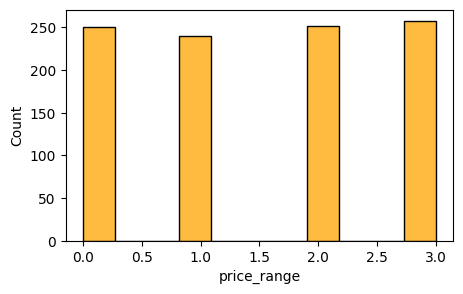

In [21]:
plt.figure(figsize = (5, 3))

sns.histplot(test_result, x = 'price_range', color = 'orange')

plt.show()

In [22]:
test_result['price_range'].value_counts()

price_range
3    258
2    252
0    250
1    240
Name: count, dtype: int64